In [ ]:
#Importing necessary libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


In [ ]:
#using pandas library and read_csv funtion to read our dataset
airbnb=pd.read_csv('/content/AB_NYC_2019.csv')

airbnb.head()

<ipython-input-3-26f4a002973c>:2: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb=pd.read_csv('/content/AB_NYC_2019.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9.0,19/10/18,0.21,6,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45.0,21/05/19,0.38,2,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0.0,NaN,NaN,1,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270.0,05/07/19,4.64,1,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9.0,19/11/18,0.10,1,0.0


In [ ]:
#Checking the number of rows
len(airbnb)

56424

In [ ]:
#checking datatype of various columns
airbnb.dtypes

id                                  int64
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                          object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                  float64
dtype: object

In [ ]:
#Describe our data
airbnb.describe()

,id,latitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.642400e+04,56424.000000,56424.000000,56424.00000,56423.000000,44729.000000,56424.000000,56423.000000
mean,1.762880e+07,40.727089,151.598681,6.95307,23.915974,1.304820,6.678807,108.643585
std,1.083680e+07,0.485760,236.345836,20.64957,45.652426,1.643738,31.079751,131.230454
min,2.539000e+03,-73.935320,0.000000,0.00000,0.000000,0.010000,0.000000,0.000000
25%,8.286476e+06,40.690140,69.000000,1.00000,1.000000,0.160000,1.000000,0.000000
50%,1.640980e+07,40.723140,107.000000,2.00000,5.000000,0.630000,1.000000,35.000000
75%,2.757972e+07,40.763260,175.000000,5.00000,24.000000,1.970000,2.000000,219.000000
max,3.648724e+07,40.913060,10000.000000,1250.00000,629.000000,58.500000,327.000000,365.000000


##Understanding, Wrangling And Cleaning Our Data


In [ ]:
#Finding Number Of Null Values

airbnb.isnull().sum()

id                                    0
name                                 21
host_id                               0
host_name                            28
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     1
last_review                       11696
reviews_per_month                 11695
calculated_host_listings_count        0
availability_365                      1
dtype: int64

In [ ]:
#Dropping Insignificant Columns

airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9.0,0.21,6,365.0
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45.0,0.38,2,355.0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0.0,NaN,1,365.0
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270.0,4.64,1,194.0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9.0,0.10,1,0.0


In [ ]:
#Replacing All NAN values in 'reviews_per_month' with zero

airbnb.fillna({'reviews_per_month':0}, inplace=True)


airbnb.reviews_per_month.isnull().sum()

0

In [ ]:
#Finding possible unique values for neighbourhood_group


airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx',
       'East Harlem'], dtype=object)

In [ ]:
len(airbnb.neighbourhood.unique())

222

In [ ]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', '100'],
      dtype=object)

In [ ]:
airbnb.host_id

0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
56419     8232441
56420     6570630
56421    23492952
56422    30985759
56423    68119814
Name: host_id, Length: 56424, dtype: object

##Exploring and Visualization Data

In [ ]:
top_host = airbnb.host_id.value_counts().head(10)

In [ ]:
top_host

219517861    327
107434423    232
30283594     158
16098958     104
137358866    103
12243051      96
61391963      85
22541573      75
200380610     65
2856748       63
Name: host_id, dtype: int64

In [ ]:
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

In [ ]:
#Setting Figure Size For Future Visualizations

sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID','host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,158
3,16098958,104
4,137358866,103
5,12243051,96
6,61391963,85
7,22541573,75
8,200380610,65
9,2856748,63


[Text(0, 0, '219517861'),
 Text(1, 0, '107434423'),
 Text(2, 0, '30283594'),
 Text(3, 0, '16098958'),
 Text(4, 0, '137358866'),
 Text(5, 0, '12243051'),
 Text(6, 0, '61391963'),
 Text(7, 0, '22541573'),
 Text(8, 0, '200380610'),
 Text(9, 0, '2856748')]

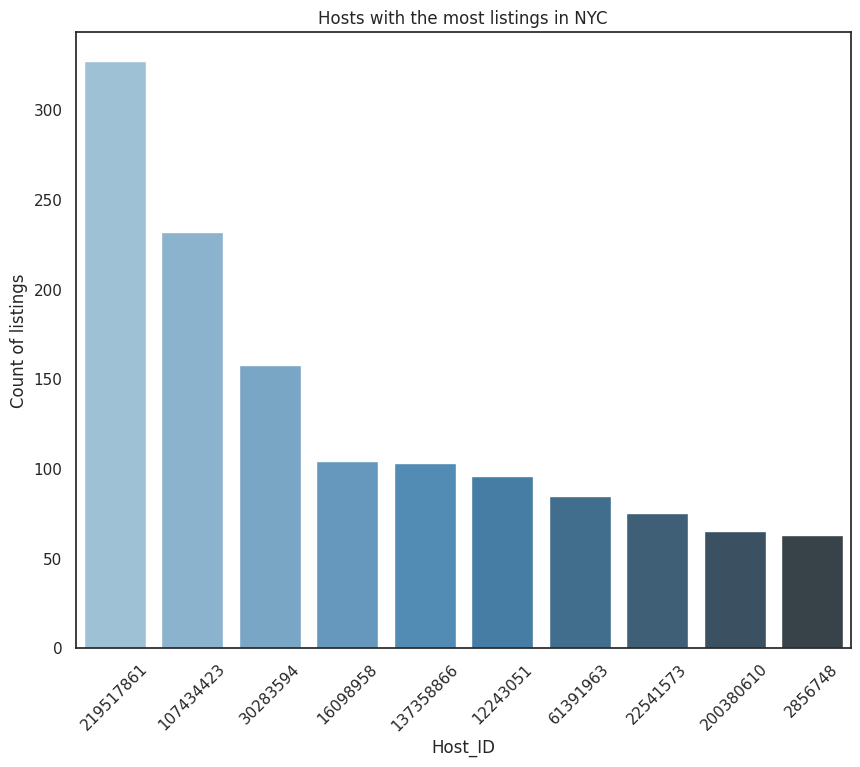

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette="Blues_d")
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_xlabel('Host_ID')
viz_1.set_ylabel('Count of listings')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [ ]:
#Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]